<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-Assignements/blob/main/End_To_End_Project/End_To_End_Project_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agenda**

1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

## **How to Approach**

Gather knowledge about problem it's current solution and how it will be used by company and downstreams

First Task is to Frame the Problem by asking question's

**Question:** What exactly is the business objective?

This is important for performance measure to evaluate your model and time spend tweaking it.

Next Question is What's the current solution?

It will give a reference performance, as well as insights on how to solve the problem.
Select a Performance Measure

Metric system gives an idea of how much error the system typically makes in its predictions.
1. **RMSE:** Root Mean Squared Error 
2. **MAE:** Mean Absolute Error
3. **Accuracy**: used for classification problems

![image](https://miro.medium.com/max/710/1*5OQunI-NR-S0gAZFIit1Rw.png)

**Check the Assumptions**

My output is used by other machine.
Ask how downstream will use your output.
example exact price or label's(“cheap,”, “medium,” or “expensive”).

# **Import all the required packages**

1. Numpy is required for all mathematical computations
2. Pandas is required for manipulating data
3. Matplotlib and Seaborn will be required for drawing graphs and drawing conclusions from the given data. Hence, EDA (Exploratory Data Analysis)

In [ ]:
import ?? as ?? 
import ?? as ??
import ?? as ??
import ?? as ??

1. Read the Data from the following link:
https://raw.githubusercontent.com/Diwakar-Gupta/assets_resources/main/datasets/titanic.csv

2. View the actual format of the data and the various features and label

# Get The Data

In [ ]:
df_train = ??.read_csv('??')
df_train.??

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S
503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S


![image](https://raw.githubusercontent.com/Pepcoders/Pepcoding-Data-Science/main/dataset/images/titanicColumns.png)

Look at the Shape of the DataFrame, to get an idea about the total entries in the dataset

In [ ]:
??_train.??

(891, 12)

Now that we have a fair idea about the data, we need to look for the following things:
1. Try finding out the null values present in the data
2. See the data types of various features 


In [ ]:
df_train.??

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Cleaning + EDA

Now, if you can see the null values, try finding the total sum of null values present for each feature. 

In [ ]:
df_train.isna().???

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Number of Null Values gives a good idea about what to do with the null values, but a graphical representation would give the impact of null values with respect to total data present. Try drawing a map of null values present

In [ ]:
sns.??(df_train.??, cmap = 'rainbow')

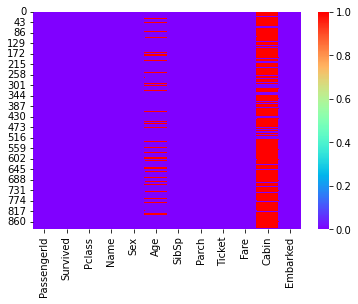

Now that we can see the null values, we need to first deal with numerical null values, there are a few options at our disposal, these are listed below:
1. Delete the entire row where null value is present.
2. Fill the null value with previous entry
3. Fill the null value with next entry
4. Fill the null value with mean, median or mode

The type of cleaning done on null values depends on our choice. This does not mean only these 4 values will be done when encountered with a null value. Though these are the most frequent ones, with respect to a numerical column containing a null value. 
This time we have to deal with 'Age', which means most appropriate thing would be the fill it with the mean value. 

This would also be clear if we make a graph, see the type of distribution, for various ages present in the data.

If you see a normal distribution, fill it with null values without giving much thought, as normal distribution, has max values near its mean

In [ ]:
sns.distplot(df_train['??'], ??=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


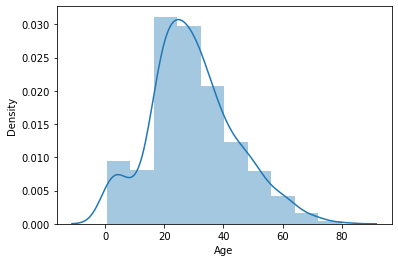

Now, that we are filling null values in Age feature with the mean Age, we need to find the mean age, this can be done, if we find the mean.
One way is the actually find the arithmetic mean, but that is tedious.
Try using the Describe Function, this would also give min, max, quatile values. 

In [ ]:
df_train.??

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Here you can see the age feature varies from 20 to 38 from 1st quartile to 3rd Quartile, This means most of the passengers in the ship are between 20 to 38 years old. And a really new born kid of few months is in the ship.**



Now that, we know the mean, store it in a variable where we will fill it later, 
also check if there are duplicate rows in the data.

All this is required so that we clean the data, which will make sure there are no absurd values in our model and prediction will be easy.

In [ ]:
Age_fill = 30

We can also check for correlations in the data, sometimes, there is high degree of correlation between the labels and the feature and hence, we can drop the feature which have little correlation as that will not impact our prediction significantly or we can use those features to do some feature engineering and create new features.

In [ ]:
df_train.??['Survived'].??(ascending=??)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Now, we are performing EDA,i.e., Exploratory Data Analysis. 
So we need to know what each feature is signifying and also how much importance it will carry when we prepare our model.

Firstly, we know that our label is which person survived. 
Now in our training data, we need to know exactly, how many people survived, so that we know about the greater percentage in our data.
This means we must know whether more people survived in our training data or whether more people did not survive in our training data.

We can use function for counting all of them, but generally graphs are preferred in EDA, simply due to visual appeal, people process images quickly when compared to raw numbers, hence try using graphs, as much as possible.

In [ ]:
df_train["??"].??

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
sns.set_style('whitegrid')
sns.??(x = '??', data =??)

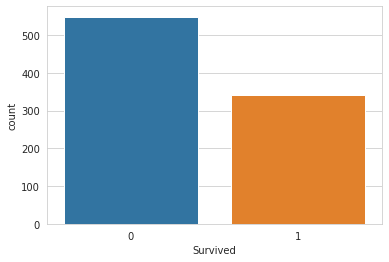

Now that we know the number of Survived people, we also need to know their variations when sex is accounted, this means we want to know how many men were their among the survived ones, because during a calamity such as the sinking of Titanic, women, children and elderly are the ones which will be saved first, but the mean age on the ship being 30, sex should be the first parameter which we look for and check it. 

In [ ]:
sns.set_style(??)
sns.??(??= 'Survived', ?? = 'Sex', ?? =??, palette = 'rainbow')

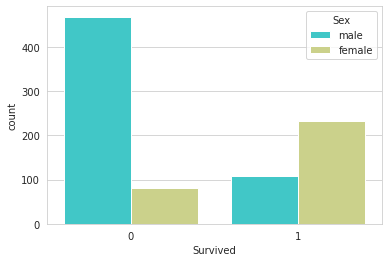

Appart from Sex, Rich people will get to survive, so we need to find rich or poor, among the survived ones. One thing to note here is that we do not have an income feature, so we try to find something that relates it, Passenger class could be a good idea, as Rich People will buy better Cabins. 
Cabin could have been used, but firstly it is a categorical data which does not represent anything where we could deduce, moreover it has a high amount of null Values


Fare is also a good parameter to judge economy but we have no idea about the price range for each class, so it would lead to a random selection of arbitrary fare, therefore we find the Passenger class `Pclass` bought by survived people. 

In [ ]:
sns.??
sns.countplot(??, hue = ??, data = ??, palette = ??)

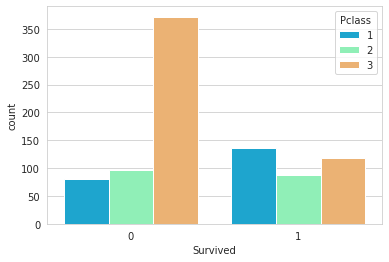

We should also look for number of people travelling with parents, siblings and spouse as, one would try to save their family first, and a rough idea would help us select the type of model which needs to be prepared. 

In [ ]:
sns.countplot(x = 'SibSp', ??)

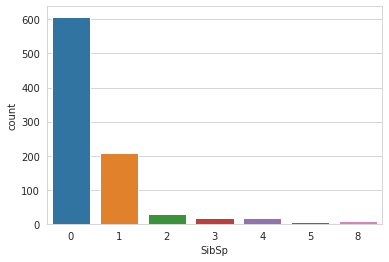

Now that we looked at each paremeters, lets look at the number of people that bought a certain type of ticket, like say there is a ticket priced 20$, getting to know the number of people which bought that ticket will help me know, the percentage economy of people on board 

In [ ]:
sns.??(df_train[??], kde = False, color = 'Darkred', ?? = 40)

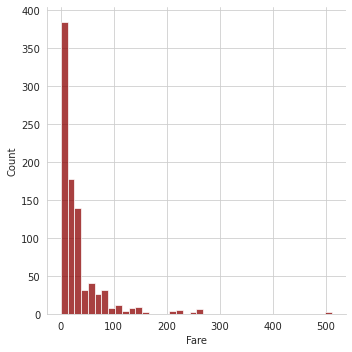

One, thing which we can see is, we needed to access each feature and see its relation with my label, i.e, Survived. This might not be needed if we see high correlation among the features and label. 

Now that, we know about the data present, lets clean the null values here and prepare our model

First fill the mean age to clean that data and see the info to check whether the null value has been accounted for. 

In [ ]:
df_train[??] = df_train[??].??(Age_fill)

In [ ]:
df_train.??.??

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

One can also check a heatmap, to see the same, as we know, maps and graphs are preferred due to visual conclusions.

In [ ]:
sns.??(df_train.??, ??= 'viridis')

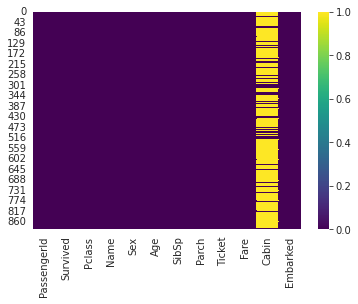

In [ ]:
pd.??(df_train['??'], df_train['??'].apply(?? x: x[0] if type(x) == str else np.nan))

Cabin,A,B,C,D,E,F,G,T
Pclass,,,,,,,,
1,15,47,59,29,25,0,0,1
2,0,0,0,4,4,8,0,0
3,0,0,0,0,3,5,4,0


We can notice, there are huge amount of null values present in the cabin features but this does not mean this feature is useless, `Pclass` and `Cabin` both feature combinely have some information to give.

**This is left for you to find.**

For now we have just removed that column from dataset.

In [ ]:
df_train.??(['Cabin'],?? = 1, ?? = True)

Another thing of importance, is there are 2 null values in the feature 'Embarked', this feature represents where did the person boarded the ship, here firstly it is categorical value, secondly this parameter could be filled with the most frequently occuring value

First try to make a plot to see the most frequently occuring value, and then fill the data with this value.

In [ ]:
df_train[??].value_counts().plot(kind='??', ??='%.2f')
plt.??

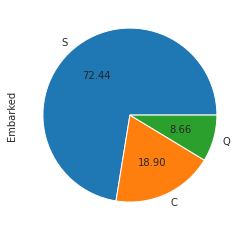

In [ ]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

One can try and check the information, to see the null values, if remaining.

In [ ]:
df_train.??

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Feature Engineering

SibSp: count of siblings or spouce

Parch: count of parents and childrens

combining this two features make sense as a count of family members.

In [ ]:
df_train['family_count'] = df_train['SibSp'] + df_train['Parch']

Now we dont need this two fields any more, we can drop them both

In [ ]:
df_train.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

# Preprocessing

Prepare data for machine learning algorithm

We can see that there are certain *text values* remaining in our dataset, we also know that our models do not work well with text values, hence we need to convert them to numerical values, of some sort.

One Hot Encoding, Ordinal Encoding is a good method to do that, but here only 2 or 3 parameters are present hence, get_dummies of pandas would not only prove simpler but also quicker.

Here **embarked and sex both are of Nominal type**, get_dummies or OneHot will do our job.

In [ ]:
embk = pd.??(df_train['Embarked'], ?? = True)
sex = ??(df_train[??], ??)

Now, Name, PassengerId and Ticket will not affect whether the person survives or not, hence we can drop them.
Sex and Embarked can be encoded and hence should be dropped as encoded parameters, will be added to the dataframe. 

In [ ]:
df_train.??([??, ??, ??, ??, ??], ?? = 1, inplace = True)

Now, add the encoded values to the main dataframe

This now makes our data clean and ready for training it appropriately. 

In [ ]:
df_train = pd.??([??, sex, ??], ?? = 1)

You can also see the dataframe into the current format to check whether its converted appropriately. 

In [ ]:
df_train.??

,Survived,Pclass,Age,Fare,family_count,male,Q,S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,1,0,1


Separate the features and labels, into x and y so that we can train our features, in order to predict the labels accordingly. 

In [ ]:
y = ??

In [ ]:
x = df_train.??(??, ??= 1)

Now that my features are recorded separately, I need to scale the features, so that all my data, in within close quarters, as we can see that fare and age will not be a close value, so we need to perform preprocessing, and scale the value within close quarters, this will be done using, Standard Scaler. 

In [ ]:
import ?? as ??
from ?? import ??

In [ ]:
# import StandardScaler
scaler = ??.??
scaled_X = scaler.??(??)

# Select and Train Model

Now the entire data is ready to be split into testing and training, splitting the data is necessary, to check the accuracies of our model. 
While splitting the features, use the scaled values


In [ ]:
# import trian test split
from ?? import ??

In [ ]:
# split using train test split method usign test_size 03
??, ??, ??, ?? = train_test_split(??, y, ??, ??= 42)

Initially, we can use various models, to train and predict the data. 
Initially try, Logistic Regression, fit and predict the data, find score and see the accuracy of that algorithm.

**Logistic Regression** is a classification algorithm and here we want to classify each person to weather he/she survived or not.

In [ ]:
# import logisticRegression and Train the model
from ?? import ??

log_reg = ??
log_reg.fit(??,??)

LogisticRegression()

In [ ]:
# predict the score on test and store into y_pred
y_pred = ??.predict(??)

Try, finding accuracy_score, to calculate for accuracy of the model. 

In [ ]:
# import accuracy score and print accuracy
from sklearn.metrics import ??

titanic_predictions = ??(X_test)
?? = accuracy_score(??, titanic_predictions)
og_score

0.8059701492537313

Upon getting the score, we can see the logistic regression algorithm has done decent work, but nothing bad with trying other classification algorithms like DecisionTree.


In [ ]:
# import decision Tree and train
from sklearn.?? import ??

tree_clf = ??()
tree_clf.fit(??, Y_train)

DecisionTreeClassifier()

In [ ]:
# using accuaracy_score print accuracy
titanic_predictions = ??(X_test)
tree_score = ??(Y_test,??)
??

0.7798507462686567

sccuracy has decreased a bit, we can try using cross validation and see the score for both Decision Tree and Linear Regression 

In [ ]:
from sklearn.?? import cross_val_score

scores = ??(tree_clf, X_train, Y_train,scoring="accuracy", cv=10)

In [ ]:
def display_scores(scores):
    print("Scores:", ??)
    print("Mean:", ??.mean())
    print("Standard deviation:", ??.std())

display_scores(??)

Scores: [0.71428571 0.77777778 0.71428571 0.80645161 0.77419355 0.70967742
 0.77419355 0.80645161 0.85483871 0.80645161]
Mean: 0.7738607270865334
Standard deviation: 0.04580104507258628


In [ ]:
log_scores = cross_val_score(??, X_train, Y_train,scoring="accuracy", cv=10)

display_scores(??)

Scores: [0.76190476 0.76190476 0.88888889 0.85483871 0.80645161 0.74193548
 0.72580645 0.77419355 0.72580645 0.93548387]
Mean: 0.7977214541730671
Standard deviation: 0.0687047480828934


Both of the above algorithms are not the best for this dataset, we may try various algorithms and try increasing the accuracy, but Random Forrest is generally known to be the best, so maybe try that.

In [ ]:
from sklearn.?? import ??

forest_clf = RandomForestClassifier()
forest_clf.??(X_train, Y_train)

titanic_predictions = ??.predict(X_test)
forest_score = ??(Y_test, titanic_predictions)
??

0.7835820895522388

In [ ]:
display_scores(??)

Scores: 0.7835820895522388
Mean: 0.7835820895522388
Standard deviation: 0.0


# Fine Tune Model

HyperParameter Tuning

After looking at these scores we might perform GridSearchCV, in order to check the best suited params from the data. 


In [ ]:
from sklearn.?? import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_clf = RandomForestClassifier()

grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                            scoring='accuracy',
                            return_train_score=True)

grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_features': 4, 'n_estimators': 30}
0.8010193548387097


Here the best model has highest n_estimators value so we can try to further increase value of `n_estimators`. Higher values of n_estimators takes a longer time to fit model you can try this in your own. Reason for this longer time will be **clearly explaned** in your future classes of RandomForest.

After finding the best params, we can find all mean params and check that best params gives the highest score.

In [ ]:
cvres = grid_search.cv_results_
for score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(score), params)

0.8887032960370389 {'max_features': 2, 'n_estimators': 3}
0.8823282982011014 {'max_features': 2, 'n_estimators': 10}
0.8914142442426584 {'max_features': 2, 'n_estimators': 30}
0.8723050664946628 {'max_features': 4, 'n_estimators': 3}
0.8895957762721732 {'max_features': 4, 'n_estimators': 10}
0.8949968462730523 {'max_features': 4, 'n_estimators': 30}
0.8850879307511149 {'max_features': 6, 'n_estimators': 3}
0.8850952199549474 {'max_features': 6, 'n_estimators': 10}
0.8932073414603743 {'max_features': 6, 'n_estimators': 30}
0.873199530093116 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.8823941040366882 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.8832418293039896 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.8869301896374499 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.8805496816963162 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
0.8914359564860109 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


# **Hurray! you have completed this excercise🤘🤘🤘**

Here are some tasks left for you if u wish to improve you skills then solve it.



*   **Find the relation between 'SibSp', 'Parch'.**
*   **Do some Hyperparameter Tuning in Logistic Regression to enhance your model.** To see the hyperparameters in logistic regression you can use sklearn official weibite to see parameters.

